# Github : https://github.com/KarisG

In [1]:
import os

In [2]:
os.getcwd()

'/home/kgwet'

In [3]:
os.chdir('/datadrive/kgwet')

In [4]:
!ls

'Covid Negative'   data.npy	      df_a_preprocessed.csv   model-001.model
'Covid Positive'   data_correct.npy   df_b_preprocessed.csv
 PetImages	   dataa.npy	      model


# Import libraries

In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import shutil

# Import data

In [6]:
cat_path = r"/datadrive/kgwet/PetImages/Cat/"
dog_path = r"/datadrive/kgwet/PetImages/Dog/"

cat_files = glob(cat_path + '/*')
dog_files = glob(dog_path + '/*')

cat_files = cat_files[:4000]
dog_files = dog_files[:4000]
# Because 25 000 images are too big for my computer


cat = []
dog = []
categories = {0:"Cat", 1:"Dog"}
labels = []

#Some images are unreadable so we have to check it before labeling
for file in cat_files:
    if cv2.imread(file) is not None:
        cat.append(file)
        labels.append(0)
        

for file in dog_files:
    if cv2.imread(file) is not None:
        dog.append(file)
        labels.append(1)

In [12]:
print("size of valid cat images :",len(cat))
print("size of valid dog images :",len(dog))
print("total",len(dog)+len(cat))

size of valid cat images : 3988
size of valid dog images : 3988
total 7976


# Labeling

# Regroup data into one list

In [13]:
data = []

In [14]:
for file in cat:
    data.append(file)

for file in dog:
    data.append(file)

In [15]:
len(data)

7976

# Visualize data

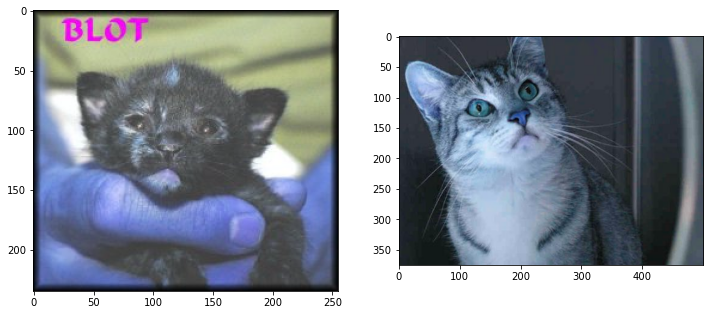

In [16]:
row = 1
col = 2
_, ax = plt.subplots(row, col, figsize=(12,12))
for i, ax in enumerate(ax.flatten()):
    img = cv2.imread(data[i])
    ax.imshow(img)

(330, 500, 3)
(120, 160, 3)


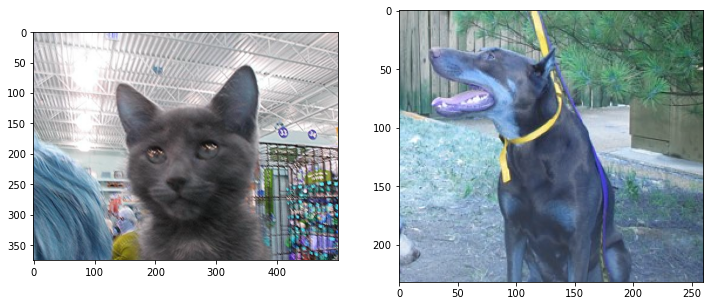

In [17]:
fig = plt.figure(figsize=(12,12))

subplot1 = fig.add_subplot(1,2,1)
subplot1.imshow(cv2.imread(data[3889]))
print(cv2.imread(data[3888]).shape)

subplot2 = fig.add_subplot(122)
subplot2.imshow(cv2.imread(data[4889]))
print(cv2.imread(data[4888]).shape)

plt.show()

* Images are not in a grayscale and there are too many differents dimensions. So we have to make pre-processing before building our model.

# Pre-processing

* Change the dimension
* Apply grayscale in each image
* Normalization
* Change the scale

In [18]:
data_pp = []

In [19]:
for img in data:
    image = cv2.imread(img)
    img_in_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(img_in_gray, (256,256))
    data_pp.append(resized)

(256, 256)
(256, 256)


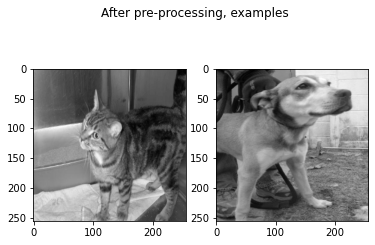

In [20]:
fig = plt.figure()

print(data_pp[3555].shape)
subplot1 = fig.add_subplot(1,2,1)
subplot1.imshow(data_pp[3555], cmap='gray')

print(data_pp[4555].shape)
subplot2=fig.add_subplot(1,2,2)
subplot2.imshow(data_pp[4555], cmap='gray');

plt.suptitle("After pre-processing, examples");

## Normalization

In [21]:
data_pp[0]

array([[ 2, 12, 12, ..., 11, 12,  2],
       [ 9, 23, 30, ..., 30, 25,  8],
       [11, 31, 46, ..., 48, 34, 10],
       ...,
       [ 8, 21, 35, ..., 27, 20, 11],
       [ 4, 14, 22, ..., 17, 15, 10],
       [ 2,  6,  9, ...,  8,  9,  8]], dtype=uint8)

In [22]:
data_pp = np.array(data_pp)

In [23]:
data_pp = data_pp / 255

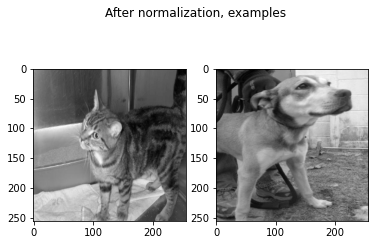

In [24]:
fig = plt.figure()

subplot1 = fig.add_subplot(1,2,1)
subplot1.imshow(data_pp[3555], cmap='gray')

subplot2=fig.add_subplot(1,2,2)
subplot2.imshow(data_pp[4555], cmap='gray');

plt.suptitle("After normalization, examples");

## Change the scale/shape

In [25]:
data_pp.shape

(7976, 256, 256)

In [26]:
data_pp = data_pp.reshape(data_pp.shape[0],data_pp.shape[1],data_pp.shape[2],1)

In [27]:
data_pp.shape

(7976, 256, 256, 1)

# Model

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

In [87]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input((256,256,1)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(2,2), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(2,2), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(2,2), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 128)     32896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 128)     

In [89]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

# Data augmentation

In [90]:
data_gen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5])

# Separation into train, validation and test set

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
labels = np.array(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data_pp, labels, test_size=0.2, random_state=2022)

XX_train, X_valid, yy_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state=2022)

In [94]:
print(XX_train.shape)
print(yy_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(5104, 256, 256, 1)
(5104,)
(1276, 256, 256, 1)
(1276,)


In [102]:
yy_train = yy_train.reshape(yy_train.shape[0],1)
y_valid = y_valid.reshape(y_valid.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [96]:
print(XX_train.shape)
print(yy_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(5104, 256, 256, 1)
(5104, 1)
(1276, 256, 256, 1)
(1276, 1)


In [112]:
yy_train = keras.utils.to_categorical(yy_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [98]:
history = model.fit(data_gen.flow(XX_train, yy_train, batch_size=8),
                           validation_data=(X_valid, y_valid), epochs=20) 

Epoch 1/20
638/638 [==============================] - 334s 523ms/step - loss: 0.7751 - accuracy: 0.5460 - val_loss: 0.6666 - val_accuracy: 0.5533
Epoch 2/20
638/638 [==============================] - 334s 523ms/step - loss: 0.7085 - accuracy: 0.5639 - val_loss: 0.9092 - val_accuracy: 0.5016
Epoch 3/20
638/638 [==============================] - 332s 521ms/step - loss: 0.6858 - accuracy: 0.5819 - val_loss: 0.9806 - val_accuracy: 0.5016
Epoch 4/20
638/638 [==============================] - 339s 531ms/step - loss: 0.6691 - accuracy: 0.5984 - val_loss: 0.6650 - val_accuracy: 0.6191
Epoch 5/20
638/638 [==============================] - 346s 542ms/step - loss: 0.6640 - accuracy: 0.5999 - val_loss: 0.6709 - val_accuracy: 0.5643
Epoch 6/20
638/638 [==============================] - 343s 538ms/step - loss: 0.6560 - accuracy: 0.6142 - val_loss: 0.6193 - val_accuracy: 0.6356
Epoch 7/20
638/638 [==============================] - 345s 541ms/step - loss: 0.6463 - accuracy: 0.6240 - val_loss: 0.6388 -

In [129]:
model.save_weights('model_weights.h5')
model.save('model_cnn_no_tl.h5')

# Test

In [113]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 18s 369ms/step - loss: 0.5683 - accuracy: 0.7118


[0.5682641863822937, 0.7117794752120972]

* We have 71% accuracy and ~0.57 loss

In [130]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

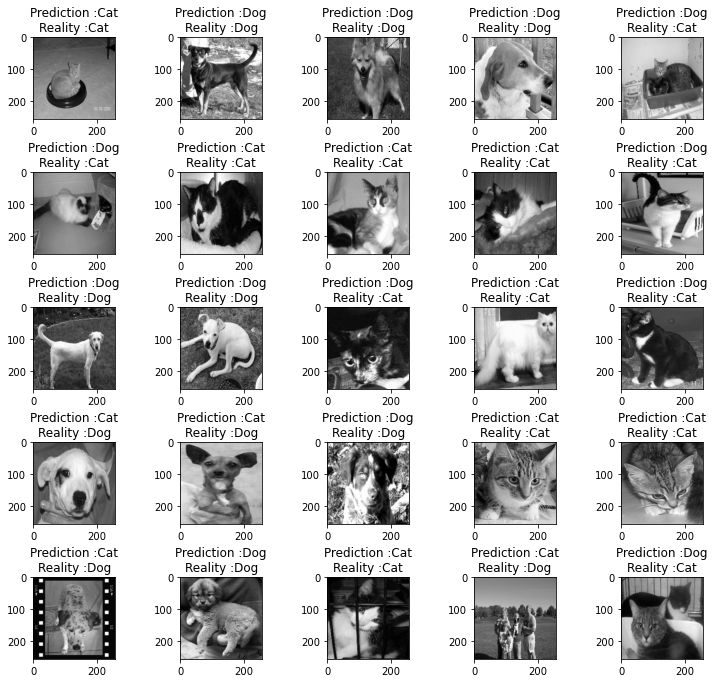

In [162]:
_, ax = plt.subplots(5,5,figsize=(12,12))
for i, ax in enumerate(ax.flatten()):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title("Prediction :"+str(categories[y_pred[i]])+"\n"+"Reality :"+str(categories[y_true[i]]))
    plt.subplots_adjust(wspace=0.8)

* Some errors but this is not surprising. We have 30% of errors

# Metrics

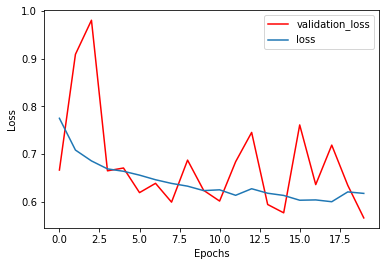

In [165]:
plt.plot(history.history["val_loss"],'r', label="validation loss")
plt.plot(history.history["loss"], label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

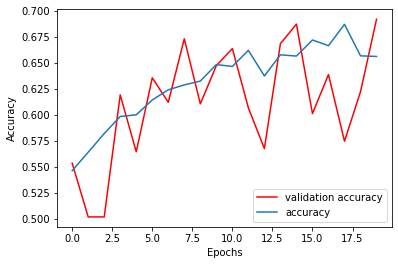

In [168]:
plt.plot(history.history["val_accuracy"],'r', label="validation accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [146]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [143]:
print(classification_report(y_pred, y_true, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.83      0.67      0.74       985
         Dog       0.59      0.78      0.68       611

    accuracy                           0.71      1596
   macro avg       0.71      0.73      0.71      1596
weighted avg       0.74      0.71      0.72      1596



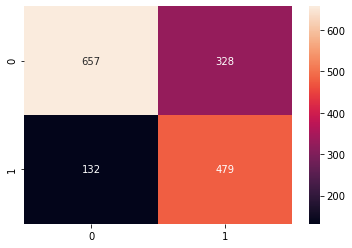

In [150]:
sns.heatmap(confusion_matrix(y_pred,y_true), annot=True, fmt='d');